# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

<h1>Done by: TAHA AHMED SIDDIQUI   48189111</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\BEYOND\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


calling all the libraries included in this file

Showing all the coloumns for Mobile_Price_Data.csv file

In [3]:
df=pd.read_csv("C:/Users/BEYOND/Downloads/Mobile_Price_Data.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890.0,668.0,13,4,19,1.0,1,0,0
1996,1965,1,2.6,1,0,0,39.0,0.2,187,4,...,915,1965.0,2032.0,11,10,16,1.0,1,1,2
1997,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632.0,3057.0,9,1,5,1.0,1,0,3
1998,1512,0,0.9,0,4,1,46.0,0.1,145,5,...,336,670.0,869.0,18,10,19,1.0,1,1,0


This is the summarize version like only showing first 10 rows.

In [4]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
5,1859,0,0.5,1,3,0,22.0,0.7,164,1,...,1004,1654.0,1067.0,17,1,10,1.0,0,0,1
6,1821,0,1.7,0,4,1,10.0,0.8,139,8,...,381,1018.0,3220.0,13,8,18,1.0,0,1,3
7,1954,0,0.5,1,0,0,24.0,0.8,187,4,...,512,NaN,700.0,16,3,5,1.0,1,1,0
8,1445,1,0.5,0,0,0,53.0,0.7,174,7,...,386,836.0,1099.0,17,1,20,1.0,0,0,0
9,509,1,0.6,1,2,1,9.0,0.1,93,5,...,1137,1224.0,513.0,19,10,12,1.0,0,0,0


It is showing all the statistical values calculated by using Mobile_Price_Data.csv file

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,...,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,1999.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.035018,0.501601,140.249000,4.520500,...,645.108000,1251.566783,2124.218609,12.306500,5.767000,11.011000,0.761381,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.142986,0.288411,35.399655,2.287837,...,443.780811,432.301505,1085.003435,4.213245,4.356398,5.463955,0.426346,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
#Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

i am removing the NAn & Null value from my dataset right now

In [72]:
#Remove the missing dataset
print('Sum of null data in each coloumn')
print(df.isnull().sum())

print('\n\nLength before cleaning data set is',len(df))
df.dropna()
df.loc[df['blue']!= 0,'blue'] = None
df.loc[df['dual_sim']!= 0,'dual_sim'] = None
df.loc[df['fc']!= 0,'fc'] = None
df.loc[df['px_height']!= 0,'px_height	'] = None
df.loc[df['sc_w']!= 0,'sc_w'] = None
df.loc[df['three_g']!= 0,'three_g	'] = None
df.loc[df['touch_screen']!= 0,'touch_screen	'] = None
df.loc[df['wifi']!= 0,'wifi	'] = None
df.loc[df['price_range']!= 0,'price_range	'] = None
# df.drop(columns=[])

print('Sum of null data in each coloumn')
print(df.isnull().sum())

print("Length after cleaning data set is",len(df))

Sum of null data in each coloumn
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64


Length before cleaning data set is 2000
Sum of null data in each coloumn
battery_power        0
blue               990
clock_speed          0
dual_sim          1019
fc                1526
four_g               0
int_memory           1
m_dep                1
mobile_wt            0
n_cores              0
pc                   0
px_height            0
px_width             1
ram                  1
sc_h                 0
sc_w              1820
talk_time            0
three_g              1
touch_screen         0
wifi                 0
price_range         

checking now the correlation B/w price range and other features

In [7]:
# Check the correlation between 'price range' and other features
correlation_matrix = df.corr()
print(correlation_matrix['price_range'])

# Select the variables that you think are helpful for predicting the price range
selected_features = ['battery_power', 'ram', 'internal_memory', 'talk_time', 'wifi', 'blue', 'dual_sim']



battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044172
m_dep            0.000159
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165735
ram              0.917089
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023739
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64


In [9]:
#Data explored after cleaning dataset

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,1010.0,2000.000000,981.0,474.0,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,...,2000.000000,1999.000000,1999.000000,2000.000000,180.0,2000.000000,1999.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.0,1.522250,0.0,0.0,0.521500,32.035018,0.501601,140.249000,4.520500,...,645.108000,1251.566783,2124.218609,12.306500,0.0,11.011000,0.761381,0.503000,0.507000,1.500000
std,439.418206,0.0,0.816004,0.0,0.0,0.499662,18.142986,0.288411,35.399655,2.287837,...,443.780811,432.301505,1085.003435,4.213245,0.0,5.463955,0.426346,0.500116,0.500076,1.118314
min,501.000000,0.0,0.500000,0.0,0.0,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0,0.700000,0.0,0.0,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.500000,1207.000000,9.000000,0.0,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0,1.500000,0.0,0.0,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,0.0,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,0.0,2.200000,0.0,0.0,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.000000,16.000000,0.0,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,0.0,3.000000,0.0,0.0,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,0.0,20.000000,1.000000,1.000000,1.000000,3.000000


A quick search will reveal many different ways to do linear regression in Python. We will use the sklearn LinearRegression function. The sklearn module has many standard machine learning methods so it is a good one to get used to working with.

Linear Regression involves fitting a model of the form:


Where 
 is the (numerical) variable we're trying to predict, 
 is the vector of input variables, 
 is the array of model coefficients and 
 is the intercept. In the simple case when X is one-dimensional (one input variable) then this is the forumula for a straight line with gradient 
.

We will first try to predict price_range from battery_power in the df data. You should look at the plot of these two variables to see that they are roughly correlated. Here is the code using slkearn to do this. We first create a linear model, then select the data we will use to train it - note that X (the input) is a one-column pandas dataframe while y (the output) is a Series. The fit method is used to train the model. The result is a set of coefficients (in this case just one) and an intercept.

In [8]:
reg = linear_model.LinearRegression()
X = df[['price_range']]
y = df['battery_power']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [78.8698] + 1120.2137999999998


In [9]:
reg.predict(X[:3])

array([1199.0836, 1277.9534, 1277.9534])

In [10]:
reg.coef_

array([78.8698])

In [11]:
reg.intercept_

1120.2137999999998

In [12]:
reg = linear_model.Ridge(alpha=.5)
X = df[['price_range']]
y = df['battery_power']
reg.fit(X, y)

Ridge(alpha=0.5)

What we have done so far is to train and test the model on the same data. This is not good practice as we have no idea how good the model would be on new data. Better practice is to split the data into two sets - training and testing data. We build a model on the training data and test it on the test data.

Sklearn provides a function train_test_split to do this common task. It returns two arrays of data. Here we ask for 20% of the data in the test set.

In [13]:
train, test = train_test_split(df, test_size=0.2, random_state=142)
print('Train Shape: ',train.shape)
print('Test Shape: ',test.shape)

Train Shape:  (1600, 21)
Test Shape:  (400, 21)


In [22]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
740,1004,1,2.9,1,0,0,35.0,0.2,141,6,...,901,1162.0,3772.0,17,8,18,0.0,1,1,3
1624,555,1,3.0,1,5,1,38.0,0.8,193,2,...,214,1970.0,1686.0,8,1,8,1.0,0,1,1
56,823,1,2.7,1,13,0,60.0,0.5,148,8,...,822,1449.0,905.0,14,11,17,1.0,1,1,0
1593,1864,0,2.2,0,0,1,7.0,0.1,142,1,...,225,1545.0,2258.0,10,1,10,1.0,0,0,2
94,1322,0,1.7,1,6,0,7.0,0.8,140,3,...,177,1990.0,1418.0,19,17,12,0.0,1,0,1


In [23]:
train.price_range

740     3
1624    1
56      0
1593    2
94      1
       ..
1292    0
511     3
411     3
1221    2
277     1
Name: price_range, Length: 1600, dtype: int64

<h2>Use an imputer transformer from scikit-learn. This allows you to fill in the missing values with a strategy like mean, median, or a more sophisticated approach.</h2>

 We can measure the mean squared error which is based on the difference between the real and predicted values of price_range (mean of the squared differences). Another measure is 
 which measures the amount of variance in the data that is explained by the model. Smaller MSE is better. 
 close to 1 is better.

In [24]:
from sklearn.impute import SimpleImputer

reg = linear_model.LinearRegression()
X_train = train[['ram', 'battery_power','px_height','int_memory']]
y_train = train['price_range']

X_test = test[['ram', 'battery_power','px_height','int_memory']]
y_test = test['price_range']


imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train)
X_train = imputer.transform(X_train)

reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [0.00094871 0.0005052  0.00041589 0.00074529] + -1.4275019388885395


USing 3 coloumns in X_train and 1 column in y_train to get bettter result

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict 'price range' on the training set
train_predictions = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predict 'price range' on the test set
test_predictions = logistic_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)


Training set accuracy: 0.50875
Test set accuracy: 0.5


C:\Users\BEYOND\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


# Create logistic regression model with adjusted parameters
log_reg = LogisticRegression(max_iter=1000, solver='sag')  # Example increased max_iter and changed solver

# Fit the model
log_reg.fit(X_train, y_train)
lr=LogisticRegression().fit(X_train,y_train)

C:\Users\BEYOND\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("Root MSE:",np.sqrt(mse))
print("R Squared:", r2)

MSE: 0.11411867019133731
Root MSE: 0.3378145499994595
R Squared: 0.9036561651833643


the value for mse is Smaller so it makes MSE better and R squared value is close to 1 is better, so overall it makes the graph overall performance higher
.

In this code, we use GridSearchCV to perform a grid search over a range of K values (from 1 to 20). We define a parameter grid containing the values of K to search. Then, we initialize the GridSearchCV object with the KNeighborsClassifier model and the parameter grid. We perform the grid search using the training set and obtain the results. We plot the mean test scores for each value of K and print the best value of K along with its corresponding mean test score. This visualization helps us understand how the choice of K affects the performance of the KNN model.




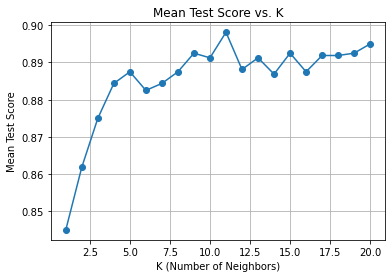

Best value of K: 11
Best mean test score: 0.898125


In [33]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define a range of K values to search
k_values = range(1, 21)

# Create a dictionary of parameters to search
param_grid = {'n_neighbors': k_values}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the results of the grid search
results = grid_search.cv_results_

# Plot the mean test scores for each value of K
plt.plot(k_values, results['mean_test_score'], marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. K')
plt.grid(True)
plt.show()

# Print the best value of K and its corresponding mean test score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print("Best value of K:", best_k)
print("Best mean test score:", best_score)


The line graph shows a sudden increase in mean test score as K value increases however, I have also displayed K=2 graph below for better understanding

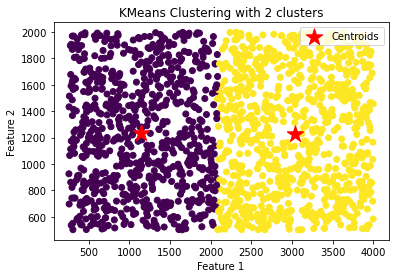

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit KMeans to your data
kmeans.fit(X_train)

# Get the labels for each data point
labels = kmeans.labels_

# Plotting the clusters
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='r', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with 2 clusters')
plt.legend()
plt.show()


Now we can see 2 different cluster 

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
# df = pd.read_csv("mobile_phone_data.csv")

# Assuming 'price_range' column contains the true labels
X = df.drop(columns=['price_range'])  # Features
y = df['price_range']  # True labels

# Split the dataset into training and testing sets
X_train, X_test, true_labels_train, true_labels_test = train_test_split(X, y, test_size=0.2, random_state=42)

# true_labels_train contains the true labels for the training data X_train


In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Now, proceed with training your classifier and evaluating its performance



In [54]:
# Check for NaN values in the original dataset
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Check for NaN values after imputation
print("NaN values after imputation in X_train:", pd.DataFrame(X_train_imputed).isnull().sum().sum())
print("NaN values after imputation in X_test:", pd.DataFrame(X_test_imputed).isnull().sum().sum())


import numpy as np

# Check for infinite values in the original dataset
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())


NaN values in X_train: 4
NaN values in X_test: 1
NaN values after imputation in X_train: 0
NaN values after imputation in X_test: 0
Infinite values in X_train: 0
Infinite values in X_test: 0


In [55]:
# Check the data types of features in X_train and X_test
print("Data types of features in X_train:")
print(X_train.dtypes)
print("\nData types of features in X_test:")
print(X_test.dtypes)

# Check summary statistics of features in X_train and X_test
print("\nSummary statistics of features in X_train:")
print(X_train.describe())
print("\nSummary statistics of features in X_test:")
print(X_test.describe())


Data types of features in X_train:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width         float64
ram              float64
sc_h               int64
sc_w               int64
talk_time          int64
three_g          float64
touch_screen       int64
wifi               int64
dtype: object

Data types of features in X_test:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width         float64
ram              float64
sc_h               int64
sc_w               int64
talk_time       

In [56]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of true_labels_train:", true_labels_train.shape)
print("Shape of true_labels_test:", true_labels_test.shape)


Shape of X_train: (1600, 20)
Shape of X_test: (400, 20)
Shape of true_labels_train: (1600,)
Shape of true_labels_test: (400,)


The workshop task this week involves unsupervised learning - an exercise in clustering. We'll use a the Mobile Price Data dataset to walk through the process of kmeans and hierarchical clustering. We'll then introduce a text dataset for you to experiment with text analysis.